In [9]:
import plotters
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [10]:
plot_single = False

In [ ]:
!rm -f task6_2_data/*
# !cd comp_math_rs && cargo run --release
!cd comp_math_rs && cargo run --release -- --compute-all

   Compiling comp_math_rs v0.1.0 (/home/vlad/Documents/VSCode/MiptCompMath/comp_math_rs)
    Finished `release` profile [optimized] target(s) in 1.04sin)           
     Running `target/release/comp_math_rs`
Ok(())
Ok(())
Ok(())
Ok(())
Failed to solve, Cannot solve system, too many iterations
Failed to solve, reason: Failed to solve
Err("Failed to solve")
Failed to solve, Cannot solve system, too many iterations
Failed to solve, reason: Failed to solve
Err("Failed to solve")
Ok(())
Ok(())
Ok(())


In [12]:
def plot_solutions(solution_containers, multidimensionals_solution=False, parameter="order"):
    plt.figure(figsize=(12, 5))
    if multidimensionals_solution:
        for solution_container in solution_containers:
            for i in range(len(solution_container.solution.x[0])):
                plt.plot(solution_container.solution.t, [a[i] for a in solution_container.solution.x], label=f"{solution_container.name} ({i})") 
        plt.xlabel("$t$")
        plt.ylabel("$x$")
        plt.title("Интегральные кривые")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
        plt.show()
    else:
        for solution_container in solution_containers:
            plt.plot(solution_container.solution.t, [a[0] for a in solution_container.solution.x], label=f"{solution_container.name}") 
        plt.xlabel("$t$")
        plt.ylabel("$x$")
        plt.title("Интегральные кривые")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
        plt.show()
        
        plt.figure(figsize=(12, 5))
        for solution_container in solution_containers:
            plt.plot([a[0] for a in solution_container.solution.x], [a[1] for a in solution_container.solution.x], label=f"{solution_container.name}") 
        plt.xlabel("$x$")
        plt.ylabel("$\\dot(x)$")
        plt.title("Фазовые траектории")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))
        plt.show()


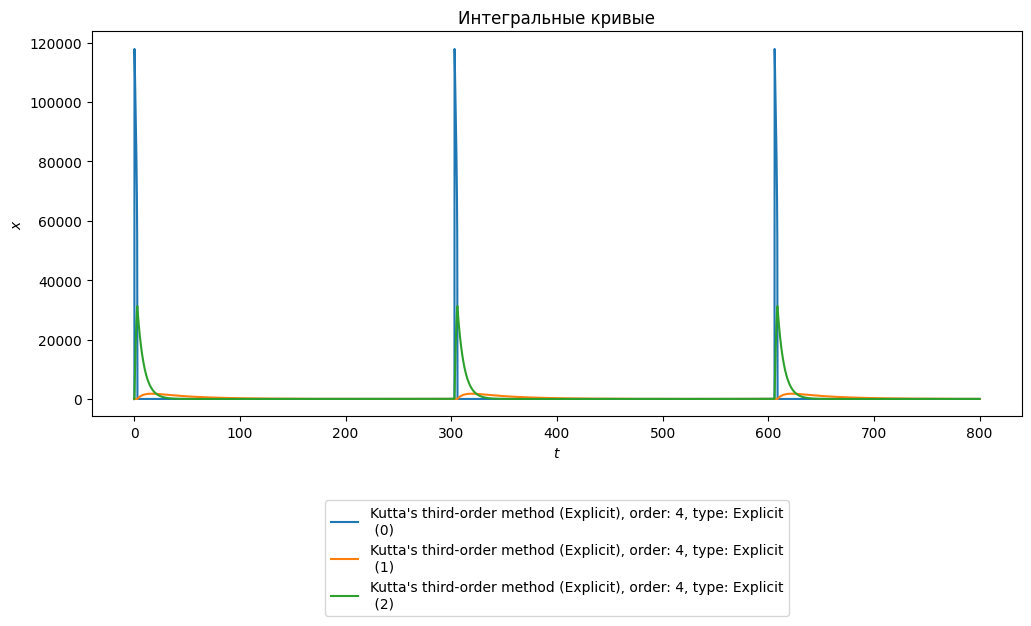

tau: 0.00001

execution time: 3.175693509 seconds


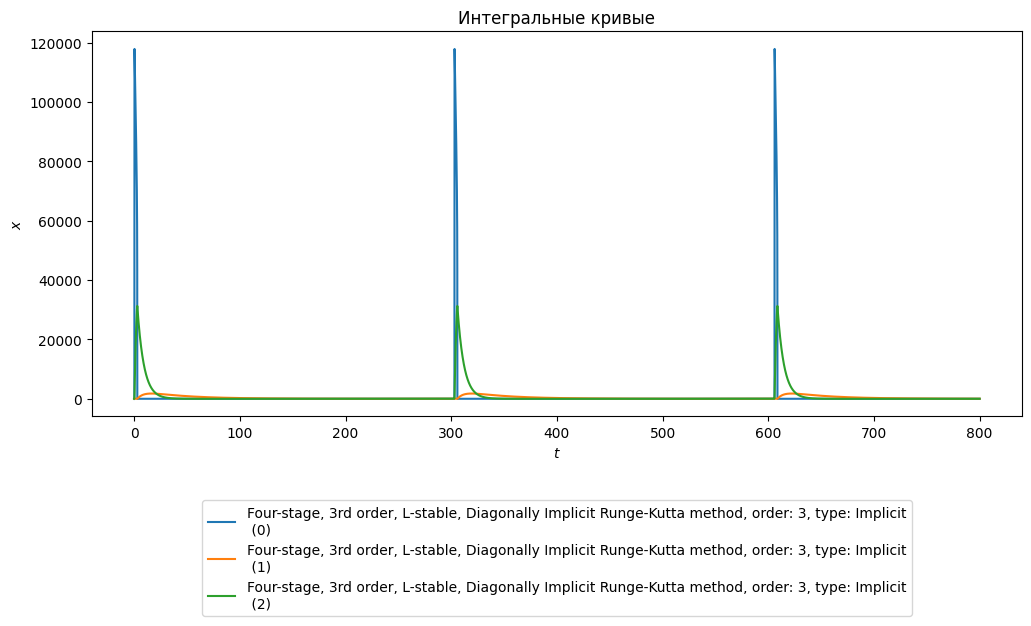

tau: 0.01

execution time: 3.257432405 seconds


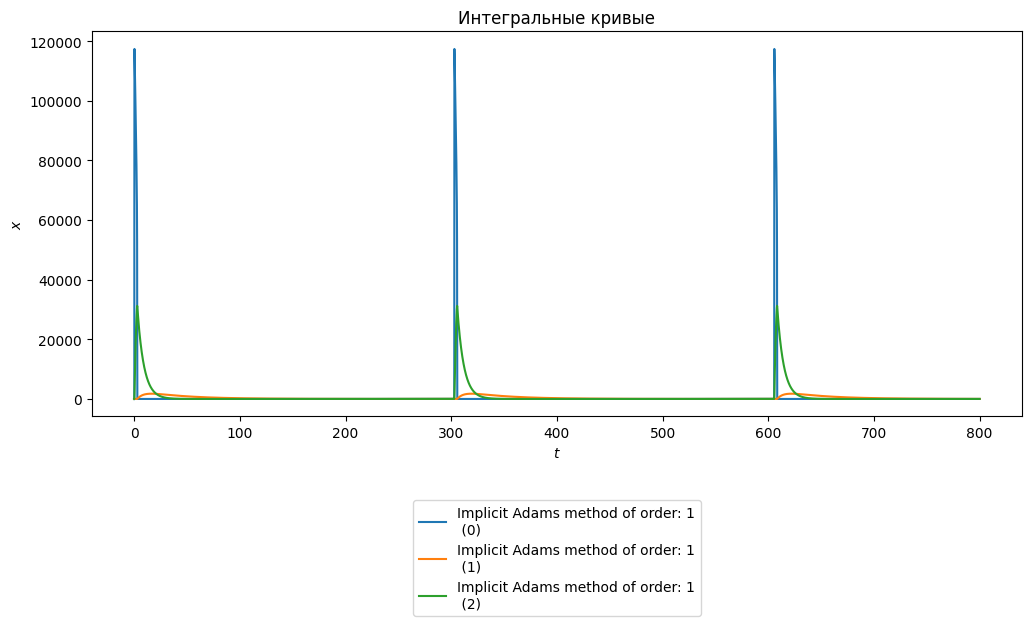

tau: 0.01

execution time: 0.087542185 seconds


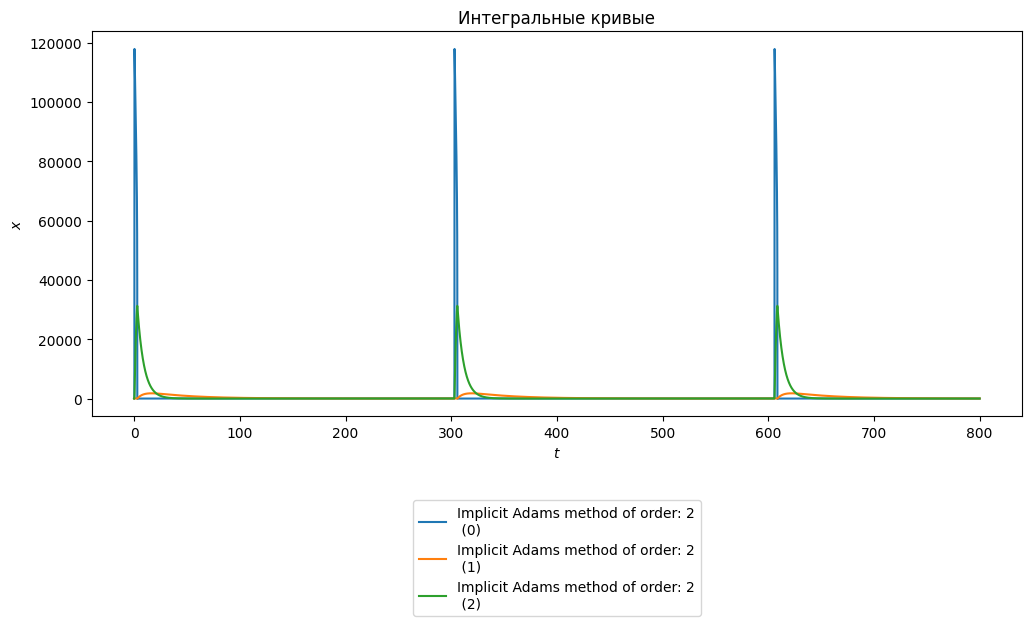

tau: 0.01

execution time: 0.045954741 seconds


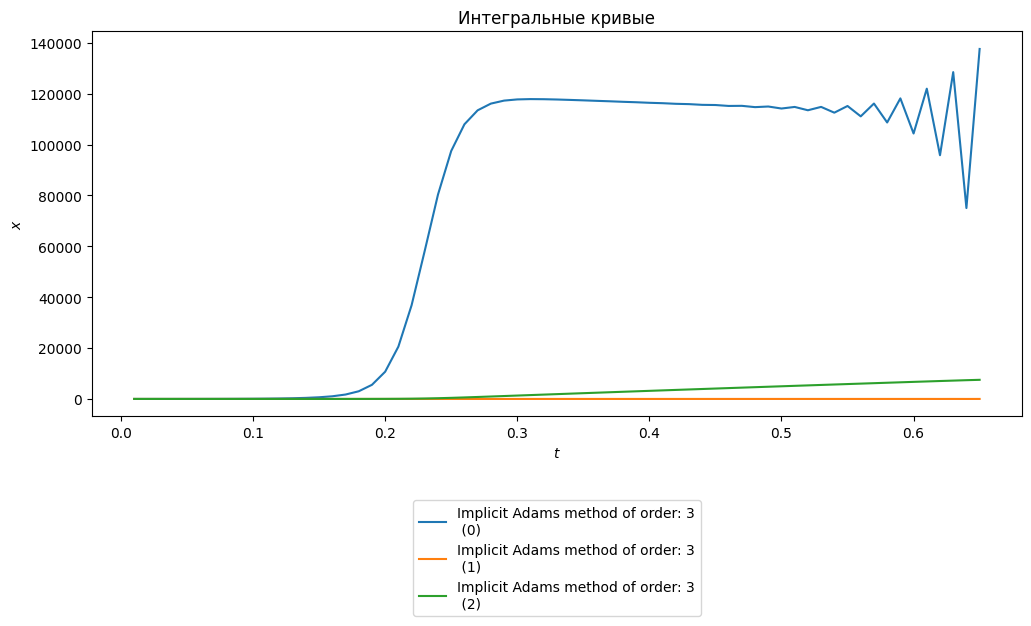

tau: 0.01

execution time: 0.000208196 seconds


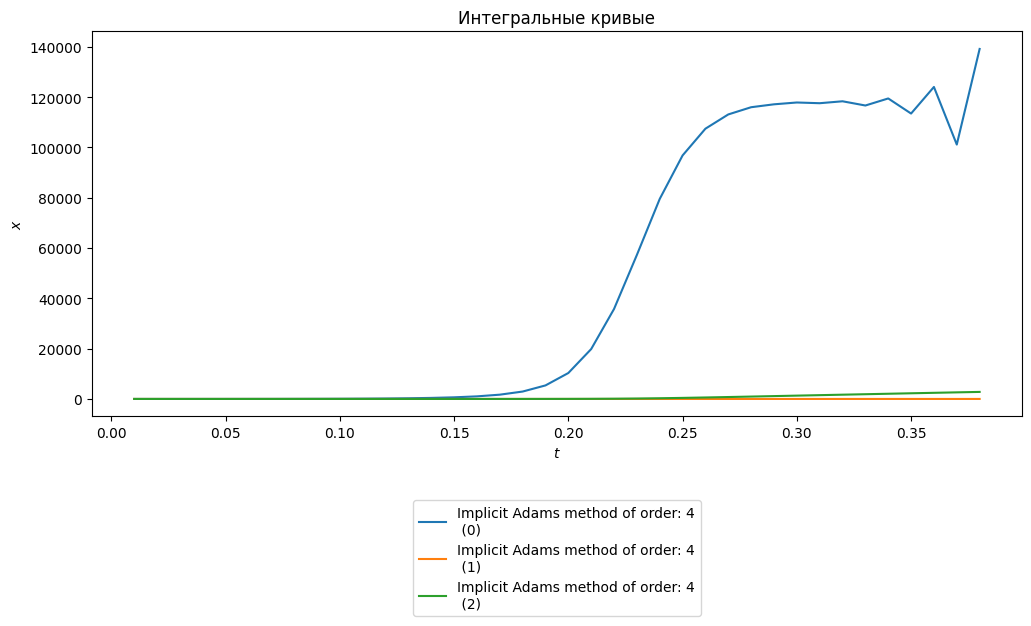

tau: 0.01

execution time: 0.000184853 seconds


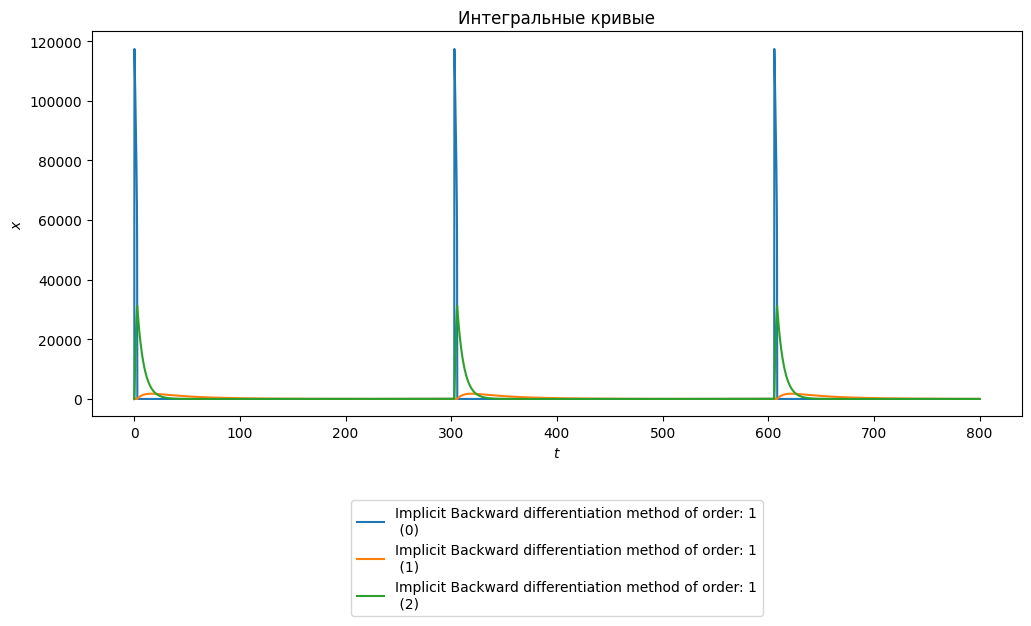

tau: 0.01

execution time: 0.089857127 seconds


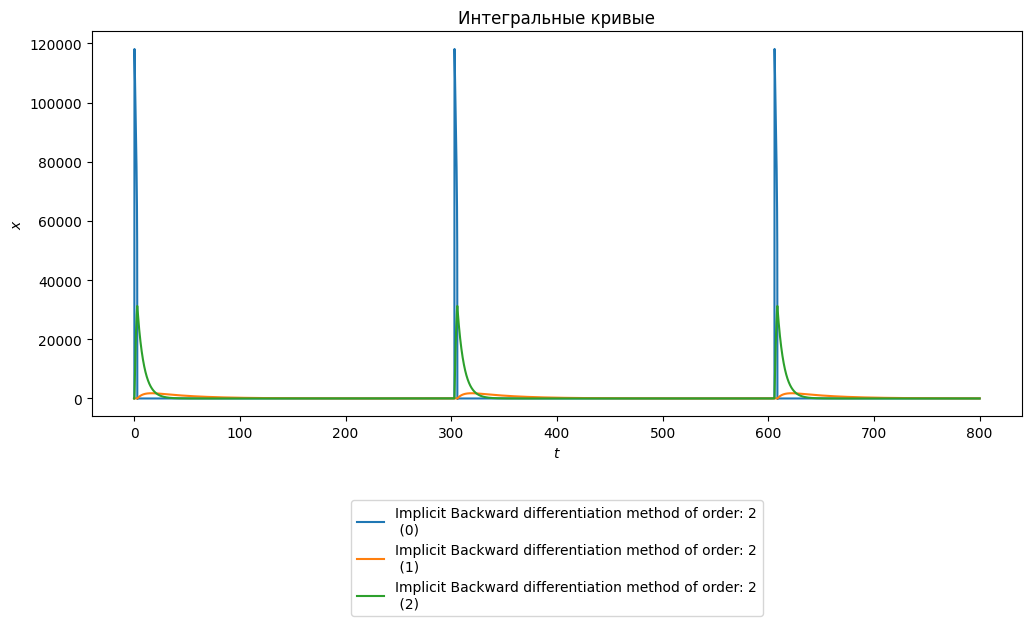

tau: 0.01

execution time: 0.041522975 seconds


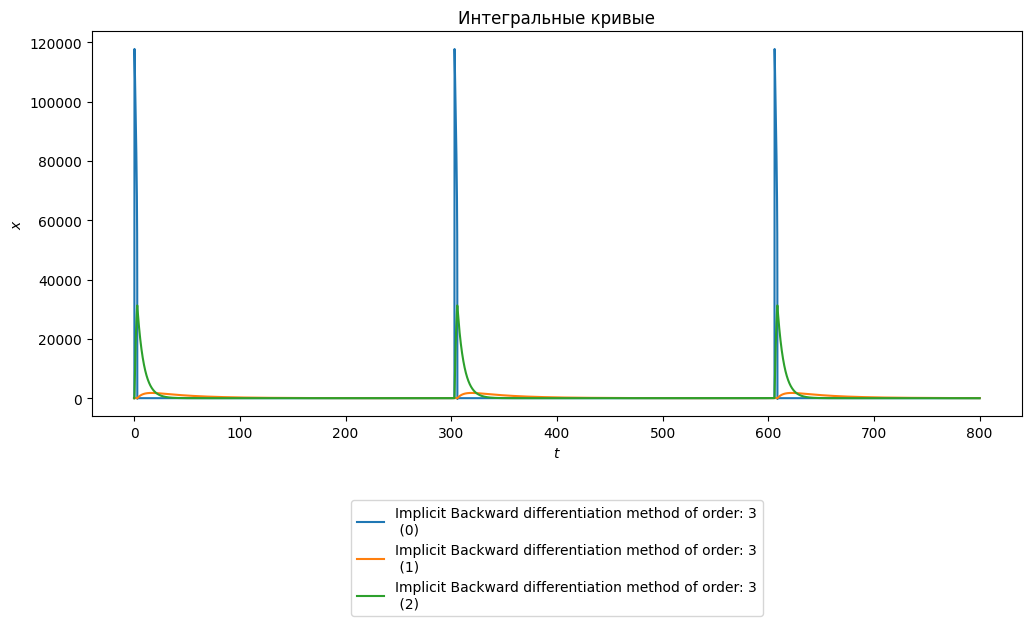

tau: 0.01

execution time: 0.039284293 seconds


In [13]:
directory = "task6_2_data"

for file in os.listdir(directory):
    if not file.endswith(".csv"):
        continue
    with open(f"{directory}/{file}", "r") as f:
        group = f.readline()        

        class EmptyClass:
            pass

        plot = EmptyClass()

        plot.name = f.readline()
        tau = f.readline()
        duration = f.readline()
        plot.solution = EmptyClass()
        plot.solution.t = []
        plot.solution.x = []
        for line in f:
            t_i = float(line.split(",")[0])
            x_i = list(map(float, line.split(",")))[1:]
            plot.solution.t.append(t_i)
            plot.solution.x.append(x_i)
        
        plot_solutions([plot], True)

        print(f"tau: {tau}")
        print(f"execution time: {duration.strip()} seconds")
